# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- Starter Code was tested on Python 3.11.11

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

## Q1 Written Part

Listing out the steps, we have:


1. $ A_1 = 1, R_1= -1$
2. $ A_2 = 2, R_2 = 1$
3. $ A_3 = 2, R_3 = -2$ 
4. $ A_4 = 2, R_4 = 2$
5. $ A_5 = 3, R_5 = 0$

At step 1, Q(a) = [0,0,0,0], So the action could be either exploration or exploitation, we get reward -1 thus Q(a) = [-1,0,0,0]

At step 2, Q(a) = [-1,0,0,0], So the action could be either exploration or exploitation, since other 3 actions have same q value, we get reward 1 for action 2 thus Q(a) = [-1,1,0,0]

At step 3, Q(a) = [-1,1,0,0], and action 2 was chosen. This is clearly an exploitation step, we get -2 reward and so Q(2) becomes $ 1 + \frac{(-2-1)}{2} = -0.5$ and Q(a) = [-1,-0.5,0,0]

At step 4, Q(a) = [-1,-0.5,0,0] and action 2 was chosen. This is definitely exploration because actions 3 and 4 have a higher q value. We get reward 2 for action 2 and Q(2) becomes $-0.5 + \frac{2-(-0.5)}{3}=0.33$ thus Q(a) = [-1,0.33,0,0]

At step 5, Q(a) = [-1,0.33,0,0] and action 3 was chosen. This is definitely exploration because action 2 had the higher q value. We get reward 0 for action 3 and thus Q(a) = [-1,0.67,0,0]

the $ \epsilon$ case definitely happened on step 4 and 5. It could have possibly happened on steps 1 and 2

## Q2 Written Part

For the general case, we would just need to keep track of previous $ \alpha_n 's$

So taking equation 2.6 from the RL2e textbook, which mentions the formula for the non - general or constant $ \alpha$ case

$$
Q_{n+1} = (1 - \alpha)^n Q_1 + \sum_{i=1}^{n} \alpha(1 - \alpha)^{n-i}R_i
$$

Modifying the expression for the general case

$$
Q_{n+1} = Q_1 \prod_{j=1}^n (1 - \alpha_j) + \sum_{i=1}^n \Bigl[\alpha_i \prod_{j=i+1}^n (1 - \alpha_j)\Bigr] R_i
$$

I verified this assumption by expanding the original formula from equation 2.5 in the book but for a non stationary $ \alpha$

$$
\begin{split}
Q_{n+1}
&= Q_n + \alpha_n\bigl[R_n - Q_n\bigr]\\
&= (1 - \alpha_n)Q_n + \alpha_n R_n\\
&= (1 - \alpha_n)\Bigl[(1 - \alpha_{n-1})\,Q_{n-1} + \alpha_{n-1}R_{n-1}\Bigr]
    + \alpha_n R_n\\
&= (1 - \alpha_n)(1 - \alpha_{n-1}) Q_{n-1}
    + (1 - \alpha_n) \alpha_{n-1} R_{n-1} + \alpha_n R_n\\
&= (1 - \alpha_n)(1 - \alpha_{n-1})\Bigl[(1 - \alpha_{n-2})\,Q_{n-2} + \alpha_{n-2}\,R_{n-2}\Bigr] + (1 - \alpha_n) \alpha_{n-1} R_{n-1} + \alpha_n R_n\\
&= (1 - \alpha_n)(1 - \alpha_{n-1})(1 - \alpha_{n-2})\,Q_{n-2} + (1 - \alpha_n)(1 - \alpha_{n-1})\,\alpha_{n-2}\,R_{n-2} + (1 - \alpha_n) \alpha_{n-1} R_{n-1} + \alpha_n R_n\\
&\quad \vdots\\
&= Q_1 \prod_{j=1}^n (1 - \alpha_j) + \sum_{i=1}^n \Bigl[\alpha_i \prod_{j=i+1}^n (1 - \alpha_j)\Bigr] R_i
\end{split}
$$

Where the first term $ \prod_{j=1}^{n}(1 - \alpha_j)$ accounts for the weight on the initial estimate $ Q_1$ and the second term  $ \alpha_i \prod_{j=i+1}^n (1 - \alpha_j)$ accounts for the weight on subsequent\current estimates.

## Q3 Written part

a) In sample average method,

$$
Q_n = \frac{1}{n-1} \sum_{j=1}^{n-1}R_j
$$

Assuming that the rewards are drawn from a distribution with the mean $ q*$,
If we take the Expectation of that expression, we end up with $ \mathbb{E}(Q_n) = q*$, Thus the sample average estimate is unbiased if the rewards are independent and identically distributed.

b) Based on the exponential recency equation

$$
Q_{n+1}=Q_n + \alpha(R_n - Q_n)
$$

taking expectation on both side and taking $ m_n = \mathbb{E}(Q_n)$

$$
m_{n+1} = m_n + \alpha(\mathbb{E}(R_n)-m_n)\\ 
= (1 - \alpha)m_n + \alpha q*
$$

Note that $ \mathbb{E}(R_n)=q*$ since we assume rewards are independent and identically distributed.

If $Q_1 = 0$ then $m_1 = 0$. Solving the recurrence:
$$
m_n = (1 - \alpha)^{n-1}m_1 + \Bigl[1 - (1 - \alpha)^{n-1}\Bigr]q*\\
= \Bigl[1 - (1 - \alpha)^{n-1}\Bigr]q*
$$

If $ n>1$, then clearly $ \Bigl[1 - (1 - \alpha)^{n-1}\Bigr]q* < q*$

Thus this case is biased

c) Taking the equation from above
$$
m_{n+1} = (1 - \alpha)m_n + \alpha q*
$$

If we want the unbiased case, $ m_1 = q*$ therefore $ m_n = q*$ for all n

Thus if our initial guess is $ q*$ the optimal action, then the exponential recency-weighted average becomes unbiased.

d) Taking the equation from part b,

$$
m_n = (1 - \alpha)^{n-1}m_1 + \Bigl[1 - (1 - \alpha)^{n-1}\Bigr]q*
$$

It is clear that as n tends to infinity, $ m_n$ tends to $ q*$
Thus $ Q_n$ is asymtotically unbiased

e) If we look at the equation above in part d (derived in part b), then it is clear that $ m_n = \mathbb{E}(Q_n) \neq q*$ for finite n (it is biased), which is the case generally (we can't run our episodes infinitely, it has to end). The bias goes away as n tends to infinity.

The only other way it becomes unbiased is by choosing $ Q_1 = q*$, which could happen by chance but we can't expect that to be the case generally.

Thus, the two conditions where we can get an unbiased exponential estimate is if we let the episodes go on infinitely or if we initialize with the optimal action. Both these conditions are generally not possible to satisfy (Alone or together), thus exponential recency-weighted average is generally expected to be biased.

In [1]:
import numpy as np
import random
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
from typing import Tuple

In [2]:
"""Here is the implementation of the 10-armed Bandit problem/testbed. DO NOT CHANGE 
   Note that:
       - call the reset function whenever you want to generate a new 10-armed Bandit problem
"""
class Bandit(object):
    def __init__(self, k=10):
        # Number of the actions
        self.k = k

        # Numpy array to store the true action value the k arms/actions
        self.q_star = np.empty(self.k)

    def reset(self):
        # Reset the true action values to generate a new k-armed bandit problem
        # Value for each arm is randomly sampled from a normal distribution 
        # with mean = 0, variance = 1.0. 
        self.q_star = np.random.normal(loc=0, scale=1, size=self.k)
        
    def best_action(self):
        """Return the indices of all best actions/arms in a list variable
        """
        return np.where(self.q_star == self.q_star.max())[0].tolist()  

    def step(self, act):
        """
        Args:
            act (int): index of the action
        """
        # Compute the reward for each action
        # The reward for each action at time step t is sampled from a Gaussian distribution
        # For the k-th arm, the mean = q_star[k] (true value) and variance = 1
        rewards = np.random.normal(loc=self.q_star, scale=np.ones(10), size=self.k)
        return rewards[act]

In [3]:
"""Here is the plotting function you can directly use to plot the figures needed for Q5 and Q6
"""

# plot function
def plot_curves(arr_list, legend_list, color_list, upper_bound, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        upper_bound (numpy array): array contains the best possible rewards for 2000 runs. the shape should be (2000,)
        ylabel (string): label of the Y axis
        
        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly. 
        Do not forget to change the ylabel for different plots.
        
        To plot the upper bound for % Optimal action figure, set upper_bound = np.ones(num_step), where num_step is the number of steps.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")
    ax.set_ylim(-0.1, upper_bound.mean() + 0.1)
    
    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3, color=color)
        # save the plot handle
        h_list.append(h) 
    
    # plot the upper bound
    h = plt.axhline(y=upper_bound.mean(), color='k', linestyle='--', label="upper bound")
    h_list.append(h)
    
    # plot legends
    ax.legend(handles=h_list)  
    plt.show()

# Q4: Implement 10-armed Bandit

In [4]:
def MultiArmBandit(k: int, num_samples: int):
    """Q4

    Structure:
        1. Create multi-armed bandit env
        2. Pull each arm `num_samples` times and record the rewards
        3. Plot the rewards (e.g. violinplot, stripplot)

    Args:
        k (int): Number of arms in bandit environment
        num_samples (int): number of samples to take for each arm
    """

    # Initialize the bandit environment and reset it
    env = Bandit(k=k)
    env.reset()

    rewards = []
    #For each arm
    for arm in range(k):
        arm_rewards = []
        #For each sample with that arm
        for _ in range(num_samples):
            reward = env.step(arm)
            arm_rewards.append(reward)
        rewards.append(arm_rewards)
    
    # Plot the rewards
    fig, ax = plt.subplots(figsize=(12, 8))
    plot = ax.violinplot(dataset=rewards,
                  showmeans=True,
                  showextrema=False,
                  showmedians=False)
    

    #Some settings to make the plot similar to the book
    for body in plot['bodies']:
        body.set_facecolor('grey')
        body.set_edgecolor('black')
        body.set_alpha(0.9)
    
    plot['cmeans'].set_linewidth(2.0)
    plot['cmeans'].set_color('black')
    
    ax.set_title("Reward Distributions per Arm(or Action)")
    ax.set_xlabel("Actions")
    ax.set_ylabel("Reward distributions")
    ax.set_xticks(range(1, k+1))
    plt.show()

    # TODO
    pass

MultiArmBandit(k=10, num_samples=2000)

# Q5: Implement ε-greedy algorithm with incremental update

The following is the scaffolding code for the epsilon-greedy agent. 

    1. Reset function: reset the Q value for each arm/action to be self.init. (e.g., self.init = 0)
    
    2. Choose action: select the arm/action using epsilon-greedy strategy.
    
    3. Update: update the time steps, Q values for k arms/actions and numbers of selecting each arm/action.
    
    4. argmax: find the indices of all maximal values in a numpu array.
    
Please finish the code under "CODE HERE"

In [5]:
class EpsilonGreedyAgent(object):
    def __init__(self, k: int, init: int, epsilon: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            epsilon (float): random action probability
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.epsilon = epsilon

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    def choose_action(self) -> int:
        """Choose which arm to pull

        With probability 1 - epsilon, choose the best action (break ties arbitrarily, use argmax() from above).
        
        With probability epsilon, choose a random action.
        """
        # CODE HERE: please implement the epsilon-greedy strategy to select the action
        # return int

        if np.random.rand() < self.epsilon:
            # Random action
            return np.random.randint(self.k)
        else:
            # Greedy action
            return self.argmax(self.Q)
 

    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1
        
        # CODE HERE: implement the incremental update
        # update the self.N
    
        self.N[action] += 1
        
        # CODE HERE: update self.Q with the incremental update
        # Note: please use the sample-average technique in equation 2.1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        # return int
        maxval = np.max(arr)
        act = np.flatnonzero(arr == maxval)
        return np.random.choice(act)

In [6]:
""" Here is the function to run the epsilon greedy agent. Please complete the missing part under "CODE HERE"
"""
# run epsilon greedy 
def run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=0.0):
    """
    Args:
        run_num (int): number of runs
        time_step (int): number of time steps per run
        epsilon (float): epsilon for the agent
        init (float): initial value for the Q. (i.e., Q1)
    """
    # DO NOT CHANGE: create the 10-armed Bandit problem
    k = 10
    env = Bandit(k)
    env.reset()

    # DO NOT CHANGE: create the agent with proper initial value and epsilon
    agent = EpsilonGreedyAgent(k=k, init=init, epsilon=epsilon)
    agent.reset()

    # DO NOT CHANGE: create a numpy array to store rewards with shape (run_num, time_step)
    # For example, results_rewards[r, t] stores the reward for step t in the r-th running trail
    results_rewards = np.empty((run_num, time_step))
    
    # DO NOT CHANGE: create a numpy array to store optimal action proportion with shape (run_num, time_step)
    # For example, results_action[r, t] stores 1 if the selected action at step t in the r-th runing trail is optimal
    # and 0 otherwise.
    results_action = np.empty((run_num, time_step))
    
    # DO NOT CHANGE: create a numpy array to save upper_bound (only for plotting rewards; it should be 1 for plotting action optimality proportion)
    # For example, upper_bound[r] stores the true action value for the r-th running trail.
    upper_bound = np.empty(run_num)
    

    # loop for trails starts
    for r in tqdm.tqdm(range(run_num), desc="run number", position=0):
        
        # CODE HERE: reset the environment to create a new 10-armed bandit problem.
        env.reset()

        # CODE HERE: reset the agent
        agent.reset()
        
        # CODE HERE: compute the upper bound for each running trial and update upper_bound[r]
        opt_act = env.best_action()  # Get the indices of optimal actions
        opt_reward = np.mean([env.q_star[a] for a in opt_act])  # Average true reward of optimal actions
        upper_bound[r] = opt_reward
        
        # loop for each trail a fixed number of steps
        for t in tqdm.tqdm(range(time_step), desc="time step", position=1, leave=False):
            
            # CODE HERE: get the best action to execute at step t 
            # act = int
            act = agent.choose_action()
            
            # CODE HERE: interact with the environment to receive rewards
            # reward = float
            reward = env.step(act)
            
            # Code HERE: update the agent based on the observed reward
            agent.update(act,reward)
                     
            """DO NOT CHANGE BELOW"""
            # save the reward
            results_rewards[r, t] = reward
            # check and save whether the action is optimal
            if act in env.best_action():
                results_action[r, t] = 1
            else:
                results_action[r, t] = 0
            
    return results_rewards, results_action, upper_bound

In [ ]:
"""Here is the implementation for running the experiment. You have to run the "run_epsilon_greedy_agent" function
   for multiple times for different parameter combination. Please use smaller run_num and time_step for Debug only.
   For example, run_num = 100, time_step = 100
"""
# always set the random seed for results reproduction
np.random.seed(1234)
random.seed(1234)
    
# set the running parameters (Use 2000 runs and 1000 steps for final report)
run_num = 2000
time_step = 1000    
# CODE HERE: 
# 1. run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.0
results_rewards1, results_action1, upper_bound1=run_epsilon_greedy_agent(run_num, time_step,0)
# 2. run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.01
results_rewards2, results_action2, upper_bound2=run_epsilon_greedy_agent(run_num, time_step,0.01)
# 3. run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.1
results_rewards3, results_action3, upper_bound3=run_epsilon_greedy_agent(run_num, time_step,0.1)

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\3543988596.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\3543988596.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\3543988596.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],


<Figure size 640x480 with 0 Axes>

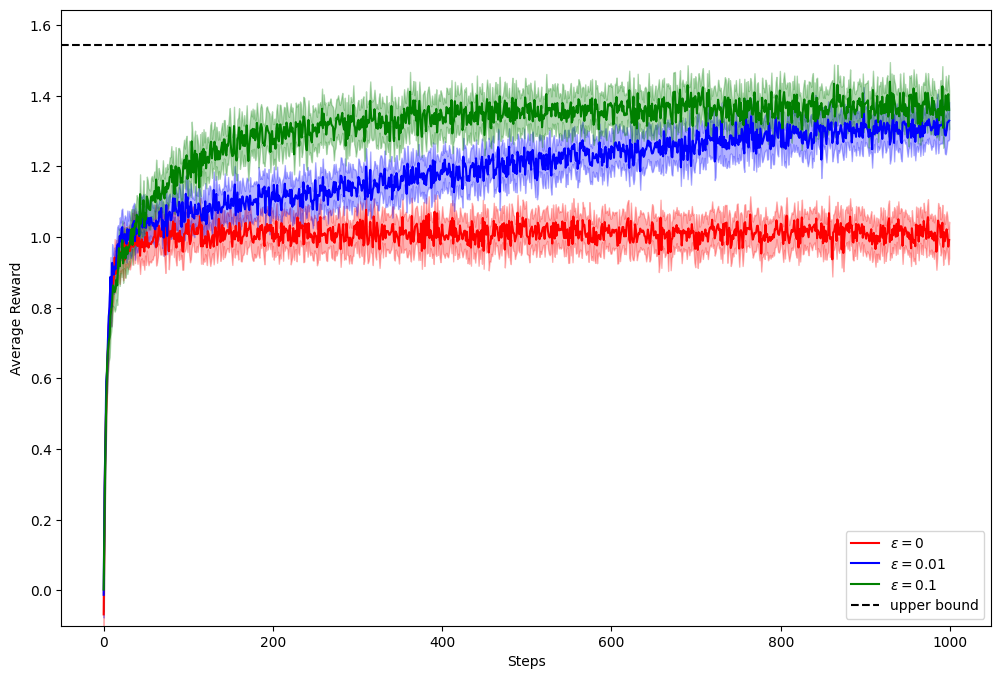

In [30]:
# Plot the "Average reward" figure
plot_curves([results_rewards1,results_rewards2,results_rewards3],
            ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],
            ["red","blue","green"],
            upper_bound,
            "Average Reward")

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\1821140567.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\1821140567.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\1821140567.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],


<Figure size 640x480 with 0 Axes>

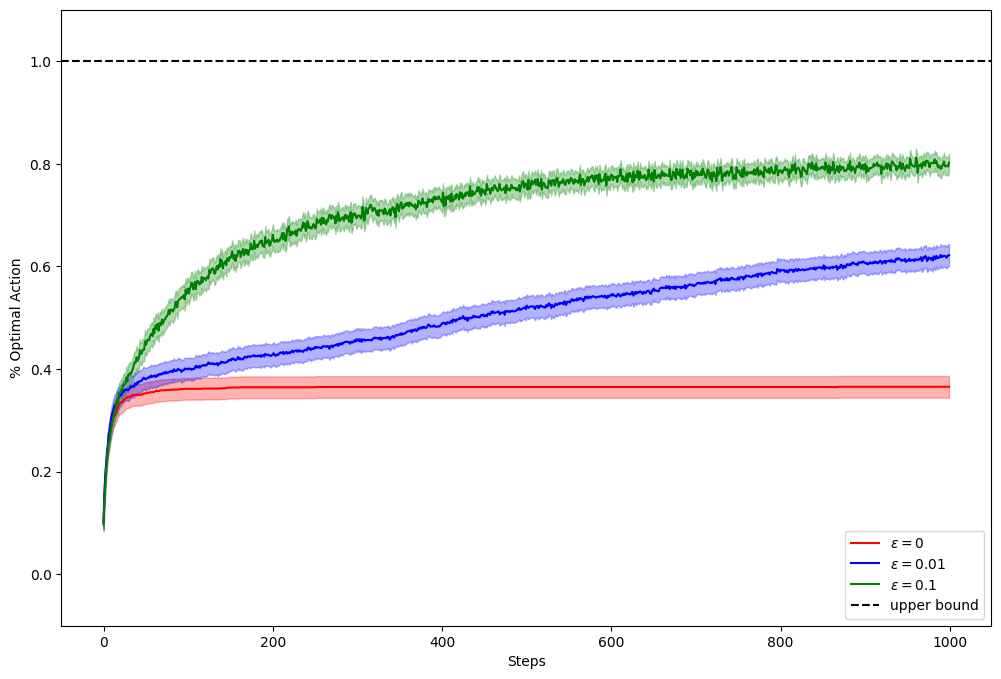

In [29]:
# Plot the "% Optimal action" figure
plot_curves([results_action1, results_action2, results_action3],
            ["$\epsilon=0$","$\epsilon=0.01$","$\epsilon=0.1$"],
            ["red","blue","green"],
            np.ones(time_step), # should be 100%
            "% Optimal Action")

## Q5 Written Part

It looks like $ \epsilon=0$ or the greedy strategy settles at about 1 average reward, This is because it found an action that got it a reward and stopped exploring. Thus, it settled at a suboptimal reward.

$ \epsilon=0.01$ has not settled in the 1000 steps, but it seems to be approaching 1.5 which is the optimal reward. At the end of the 1000 steps, it gets around 1.3. It is rising steadily because there is some exploration, so it takes the greedy action most of the time, keeping its reward high, but it also explores 1% of the time, giving it access to other actions that may be better.

For $ \epsilon=0.1$, it seems to settle at about 1.4 reward, however, it is converging to 1.5 as well albeit slowly. This policy rises very quickly in rewards because it is exploring 10% of the time. It keeps finding newer and better actions more quickly. However, it settles after likely having explored all the actions, and so it seems to slow down because the q values have developed and are slowly converging.

The difference in these policies is due to the rate of exploration, a smaller exploration rate means that it gets enough time to develop the q value for what it thinks is the best action, a larger rate corrensponds to a faster rise time, but slower convergence. And 0 exploration means it settles for a suboptimal action.

# Q6: Implement the ε-greedy algorithm with optimistic initial values, and the bandit algorithm with UCB action selection

In [45]:
""" Reproducing the Figure 2.3.
Please note, instead of using the sample-average technique,
Use equation 2.5 to update the Q values with \alpha=0.1
"""
class EpsilonGreedyAgent(object):
    def __init__(self, k: int, init: int, epsilon: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            epsilon (float): random action probability
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.epsilon = epsilon

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    def choose_action(self) -> int:
        """Choose which arm to pull

        With probability 1 - epsilon, choose the best action (break ties arbitrarily, use argmax() from above).
        
        With probability epsilon, choose a random action.
        """
        # CODE HERE: please implement the epsilon-greedy strategy to select the action
        # return int
        if np.random.rand() < self.epsilon:
            # Random action
            return np.random.randint(self.k)
        else:
            # Greedy action
            return self.argmax(self.Q)

    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1
        
        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1

        # Exponential Recency-Weighted Average (Equation 2.5)
        alpha = 0.1
        # self.Q[action] += alpha * (reward - self.Q[action])
        
        # # Sample-Average Update (Equation 2.1)
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        # return int
        maxval = np.max(arr)
        act = np.flatnonzero(arr == maxval)
        return np.random.choice(act)

In [46]:
""" Here is the implementation of the UCB agent. Please complete the missing part.
"""
class UCBAgent(object):
    def __init__(self, k: int, init: int, c: float) -> None:
        """Epsilon greedy bandit agent

        Args:
            k (int): number of arms
            init (init): initial value of Q-values
            c (float): UCB constant that controls degree of exploration
        """
        # Number of the arms. For example, k = 10 for 10-armed Bandit problem
        self.k = k

        # Initial Q value
        self.init = init

        # Epsilon value
        self.c = c

        # Q-values for each arm
        self.Q = None
        # Number of times each arm was pulled
        self.N = None
        # Current total number of steps
        self.t = None

    def reset(self) -> None:
        """Initialize or reset Q-values and counts

        This method should be called after __init__() at least once
        """
        self.Q = self.init * np.ones(self.k, dtype=np.float32)
        self.N = np.zeros(self.k, dtype=int)
        self.t = 0

    def choose_action(self):
        """Choose which arm to pull

        Use UCB action selection. Be sure to consider the case when N_t = 0 and break ties randomly (use argmax() from above)
        """
        # CODE HERE: use UCB to select the action. Be sure to consider the case when N_t = 0
        # and break ties randomly (use argmax() from above). The return should be an integer
        # index of the action.
        # return int

        # If an arm has never been selected, pick from those first.
        N_t_0 = np.where(self.N == 0)[0]
        if len(N_t_0) > 0:
            return np.random.choice(N_t_0)
        else:
            # Compute UCB for each arm:
            ucb = self.Q + self.c * np.sqrt(np.log(self.t) / self.N)
            return self.argmax(ucb)



    def update(self, action: int, reward: float) -> None:
        """Update Q-values and N after observing reward.

        Args:
            action (int): index of pulled arm
            reward (float): reward obtained for pulling arm
        """
        # increase the time step
        self.t += 1

        # CODE HERE: implement the incremental update
        # update the self.N
        self.N[action] += 1

        # CODE HERER: update self.
        # Note: For reproducing Figure 2.3, implement the exponential average (equation 2.5)
        # Note: For reproducing Figure 2.4, implement the sample average (equation 2.1)
        
        # Exponential Recency-Weighted Average (Equation 2.5)
        alpha = 0.1
        # self.Q[action] += alpha * (reward - self.Q[action])
        
        # Sample-Average Update (Equation 2.1)
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
    @staticmethod
    def argmax(arr) -> int:
        """Argmax that breaks ties randomly

        Takes in a list of values and returns the index of the item with the highest value, breaking ties randomly.

        Note: np.argmax returns the first index that matches the maximum, so we define this method to use in EpsilonGreedy and UCB agents.
        Args:
            arr: sequence of values
        """
        #CODE HERE: implement argmax_a Q(a) for the greedy action selection, breaking ties randomly.
        # return int
        maxval = np.max(arr)
        act = np.flatnonzero(arr == maxval)
        return np.random.choice(act)


In [47]:
"""Here is the implementation of running the UCB agent. Please complete the missing part.
"""
# run epsilon greedy 
def run_ucb_agent(run_num, time_step, c):
    # create the 10-armed Bandit problem
    k = 10
    env = Bandit(k)
    env.reset()

    # create the agent
    my_agent = UCBAgent(k=k, init=0.0, c=c)
    my_agent.reset()

    # create a numpy array
    results_rewards = np.empty((run_num, time_step))
    
    # create a numpy array
    results_action = np.empty((run_num, time_step))

    # loop starts
    upper_bound = np.empty(run_num)
    for r in tqdm.tqdm(range(run_num), desc="run number", position=0):
       
        # CODE HERE: reset the environment and the agent
        # create a new 10-armed bandit problem
        env = Bandit(k)
        env.reset()
        
        # CODE HERE: create a new agent
        agent = UCBAgent(k=k, init=0.0, c=c)
        agent.reset()

        # CODE HERE: update upper_bound[r]
        opt_act = env.best_action()  # Get the indices of optimal actions
        opt_reward = np.mean([env.q_star[a] for a in opt_act])  # Average true reward of optimal actions
        upper_bound[r] = opt_reward


        for t in tqdm.tqdm(range(time_step), desc="time step", position=1, leave=False):
            # CODE HERE: choose action for time step t
            # act = int
            act = agent.choose_action()

            # CODE HERE: interact with the environment
            # reward = float
            reward = env.step(act)

            # CODE HERE: update the bandit agent with the observed reward
            agent.update(act, reward)
            
            # save the reward
            results_rewards[r, t] = reward
            # compute the optimality
            if act in env.best_action():
                results_action[r, t] = 1
            else:
                results_action[r, t] = 0
            
    return results_rewards, results_action, upper_bound

In [48]:
""" Here is the function to run the epsilon greedy agent. Please complete the missing part under "CODE HERE"
"""
# run epsilon greedy 
def run_epsilon_greedy_agent(run_num, time_step, epsilon=0.0, init=0.0):
    """
    Args:
        run_num (int): number of runs
        time_step (int): number of time steps per run
        epsilon (float): epsilon for the agent
        init (float): initial value for the Q. (i.e., Q1)
    """
    # DO NOT CHANGE: create the 10-armed Bandit problem
    k = 10
    env = Bandit(k)
    env.reset()

    # DO NOT CHANGE: create the agent with proper initial value and epsilon
    agent = EpsilonGreedyAgent(k=k, init=init, epsilon=epsilon)
    agent.reset()

    # DO NOT CHANGE: create a numpy array to store rewards with shape (run_num, time_step)
    # For example, results_rewards[r, t] stores the reward for step t in the r-th running trail
    results_rewards = np.empty((run_num, time_step))
    
    # DO NOT CHANGE: create a numpy array to store optimal action proportion with shape (run_num, time_step)
    # For example, results_action[r, t] stores 1 if the selected action at step t in the r-th runing trail is optimal
    # and 0 otherwise.
    results_action = np.empty((run_num, time_step))
    
    # DO NOT CHANGE: create a numpy array to save upper_bound (only for plotting rewards; it should be 1 for plotting action optimality proportion)
    # For example, upper_bound[r] stores the true action value for the r-th running trail.
    upper_bound = np.empty(run_num)
    

    # loop for trails starts
    for r in tqdm.tqdm(range(run_num), desc="run number", position=0):
        
        # CODE HERE: reset the environment to create a new 10-armed bandit problem.
        env.reset()

        # CODE HERE: reset the agent
        agent.reset()
        
        # CODE HERE: compute the upper bound for each running trial and update upper_bound[r]
        opt_act = env.best_action()  # Get the indices of optimal actions
        opt_reward = np.mean([env.q_star[a] for a in opt_act])  # Average true reward of optimal actions
        upper_bound[r] = opt_reward
        
        # loop for each trail a fixed number of steps
        for t in tqdm.tqdm(range(time_step), desc="time step", position=1, leave=False):
            
            # CODE HERE: get the best action to execute at step t 
            # act = int
            act = agent.choose_action()
            
            # CODE HERE: interact with the environment to receive rewards
            # reward = float
            reward = env.step(act)
            
            # Code HERE: update the agent based on the observed reward
            agent.update(act,reward)
                     
            """DO NOT CHANGE BELOW"""
            # save the reward
            results_rewards[r, t] = reward
            # check and save whether the action is optimal
            if act in env.best_action():
                results_action[r, t] = 1
            else:
                results_action[r, t] = 0
            
    return results_rewards, results_action, upper_bound

# Reproduce Figure 2.3 using exponential average (equation 2.5 with alpha = 0.1)

In [ ]:
"""Here is the implementation for running the experiment. You have to run the "run_ucb_agent" function
   for multiple times for different parameter combination. Please use smaller run_num and time_step for Debug only.
   For example, run_num = 100, time_step = 1000
"""
# set the running parameters
run_num = 2000
time_step = 1000
    
# CODE HERE: 
# 1. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.0
results_rewards4, results_action4, upper_bound4 = run_epsilon_greedy_agent(run_num, time_step,0,0)
# 2. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.0
results_rewards5, results_action5, upper_bound5 = run_epsilon_greedy_agent(run_num, time_step,0,5)
# 3. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.1 
results_rewards6, results_action6, upper_bound6 = run_epsilon_greedy_agent(run_num, time_step,0.1,0)
# 4. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.1 
results_rewards7, results_action7, upper_bound7 = run_epsilon_greedy_agent(run_num, time_step,0.1,5)
# 5. Run the UCB agent experiment for c=2
results_rewards8, results_action8, upper_bound8 = run_ucb_agent(run_num, time_step,2)

In [44]:
# Plot the "% Optimal action" figure
plot_curves([results_action4,results_action5,results_action6,results_action7,results_action8],
            ["$\epsilon$ greedy:$\epsilon=0, Q_1=0$","$\epsilon$ greedy:$\epsilon=0, Q_1=5$",
             "$\epsilon$ greedy:$\epsilon=0.1, Q_1=0$","$\epsilon$ greedy:$\epsilon=0.1, Q_1=5$",
             "UCB:$c=2$"],
            ["red","green","blue","orange","cyan"],
            np.ones(time_step), # should be 100%
            "% Optimal Action")

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\2250522050.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon$ greedy:$\epsilon=0, Q_1=0$","$\epsilon$ greedy:$\epsilon=0, Q_1=5$",
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\2250522050.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon$ greedy:$\epsilon=0, Q_1=0$","$\epsilon$ greedy:$\epsilon=0, Q_1=5$",
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\2250522050.py:4: SyntaxWarning: invalid escape sequence '\e'
  "$\epsilon$ greedy:$\epsilon=0.1, Q_1=0$","$\epsilon$ greedy:$\epsilon=0.1, Q_1=5$",
C:\Users\adn

<Figure size 640x480 with 0 Axes>

# Reproduce Figure 2.4 using sample average (equation 2.1)

In [ ]:
"""Here is the implementation for running the experiment. You have to run the "run_ucb_agent" function
   for multiple times for different parameter combination. Please use smaller run_num and time_step for Debug only.
   For example, run_num = 100, time_step = 1000
"""
# always set the random seed for results reproduction
np.random.seed(1234)
random.seed(1234)

# set the number of run
run_num = 2000
# set the number of time steps
time_step = 1000

# CODE HERE: 
# 1. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.0
results_rewards9, results_action9, upper_bound9 = run_epsilon_greedy_agent(run_num, time_step,0,0)
# 2. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.0
results_rewards10, results_action10, upper_bound10 = run_epsilon_greedy_agent(run_num, time_step,0,5)
# 3. Run the epsilon-greedy agent experiment for initial value = 0.0, epsilon = 0.1 
results_rewards11, results_action11, upper_bound11 = run_epsilon_greedy_agent(run_num, time_step,0.1,0)
# 4. Run the epsilon-greedy agent experiment for initial value = 5.0, epsilon = 0.1 
results_rewards12, results_action12, upper_bound12 = run_epsilon_greedy_agent(run_num, time_step,0.1,5)
# 5. Run the UCB agent experiment for c=2
results_rewards13, results_action13, upper_bound13 = run_ucb_agent(run_num, time_step,2)

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\482727235.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon$ greedy:$\epsilon=0, Q_1=0$","$\epsilon$ greedy:$\epsilon=0, Q_1=5$",
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\482727235.py:3: SyntaxWarning: invalid escape sequence '\e'
  ["$\epsilon$ greedy:$\epsilon=0, Q_1=0$","$\epsilon$ greedy:$\epsilon=0, Q_1=5$",
C:\Users\adnan\AppData\Local\Temp\ipykernel_11480\482727235.py:4: SyntaxWarning: invalid escape sequence '\e'
  "$\epsilon$ greedy:$\epsilon=0.1, Q_1=0$","$\epsilon$ greedy:$\epsilon=0.1, Q_1=5$",
C:\Users\adnan\

<Figure size 640x480 with 0 Axes>

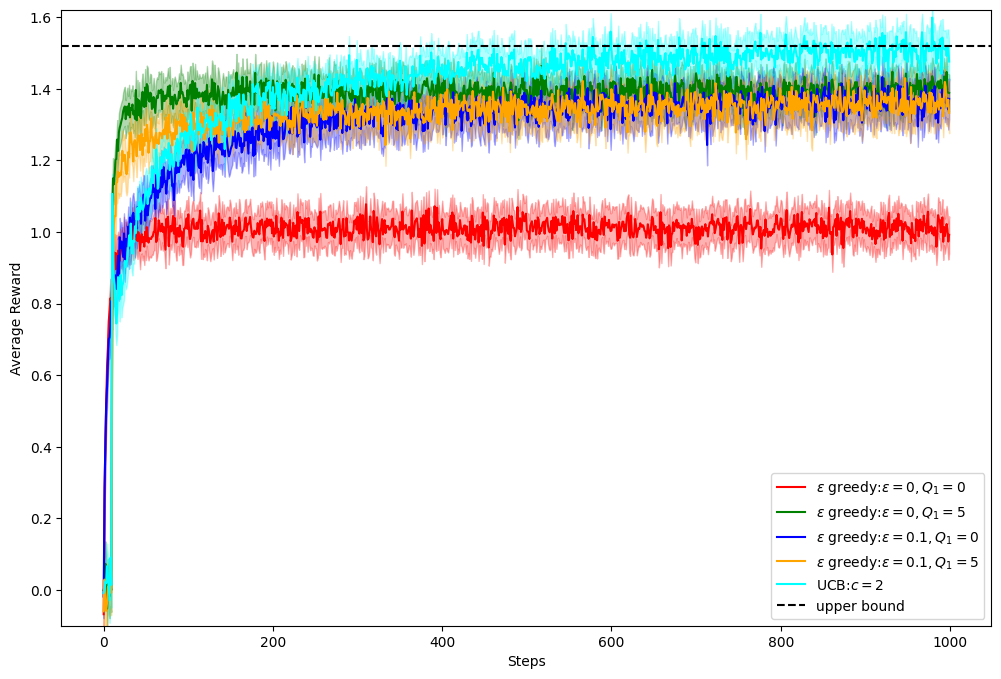

In [50]:
# Plot the "Average reward" figure
plot_curves([results_rewards9,results_rewards10,results_rewards11,results_rewards12,results_rewards13],
            ["$\epsilon$ greedy:$\epsilon=0, Q_1=0$","$\epsilon$ greedy:$\epsilon=0, Q_1=5$",
             "$\epsilon$ greedy:$\epsilon=0.1, Q_1=0$","$\epsilon$ greedy:$\epsilon=0.1, Q_1=5$",
             "UCB:$c=2$"],
            ["red","green","blue","orange","cyan"],
            upper_bound10,
            "Average Reward")

## Q6 Written

In the case on optimistic initialization of the $ \epsilon$ greedy agent, The early steps favor the action that is expected to have good reward, but when this reward is less than expected, the estimate is adjusted down resulting in the peak in the graph (the rising part due to high reward expectation and the falling part due to real average of the rewards)

In the case of UCB, early confidence bounds are wide, so it initially tries each arm to reduce uncertainty. As soon as a few arms are sampled (and some disappoint), their confidence bounds narrow, so the method’s action selection shifts towards the wider confidence bounds, creating the same kind of up‐down pattern

Basically, in both the cases the aggressive exploration (either due to optimistic starts or wide confidence bounds) initially overshoot the real values, but then dips when the agent starts to get real data.

In [51]:
def generate_bandits(arms = 10):
    # CODE HERE: Generate a k-armed bandit using the procedure described in Section 2.3
    

def generate_reward(bandits, arm):
    # CODE HERE: Generate a random reward using the specified arm of the bandit, 
    # with reward distribution as described in Section 2.3

    
def gen_argmax(l, return_all = False):
    # CODE HERE: Generalized argmax that finds all maximal elements and breaks ties 
    # If return_all is true, returns all maximal indices;
    # otherwise, tie is broken randomly and some element is returned

def plot_avg_se(data, num_se = 1.96, linestyle = 'k-'):
    means = []
    lowers = []
    uppers = []
    N = len(data)
    T = len(data[0])
    for t in range(T):
        data_t = [d[t] for d in data]
        mean = np.mean(data_t)
        se = np.std(data_t) / np.sqrt(N)
        means += [mean]
        lowers += [mean - num_se * se]
        uppers += [mean + num_se * se]
    h, = plt.plot(range(1,T+1), means, linestyle)
    plt.fill_between(range(1,T+1), lowers, uppers, color = linestyle[0], alpha = 0.2)
    return h


def q7(arms = 10, steps = 10000, trials = 2000, epsilon = 0.1, alpha = 0.1):
    rewards = [[] for _ in range(2)]
    optimals = [[] for _ in range(2)]
    upper_bound = []
    for trial in range(trials):
        if (trial + 1) % 10 == 0:
            print(trial + 1)
            
        # Initialize the bandit (all q* = 0)
        # Implement epsilon-greedy in the loop;
        # keep track of Q, N estimates and rewards, optimal actions, upper bounds
        # for both alpha = None and alpha = 0.1
        
        # CODE HERE: Initilization        

        
        # CODE HERE: LOOP        
        for t in range(steps):
            # Hint: you should determine best action at time t and its value, do the Epsilon-greedy action selection            
            # And explore both alpha = None and alpha = 0.1 at the same time 
            # Please use the variable name of: rs_none  rs_alpha to store the rewards and opts_none opts_alpha to store the optimal actions
            # and use upper to represent the upper bound value.
             
            
        # Store rewards and whether chosen actions were optimal
        rewards[0] += [rs_none]
        rewards[1] += [rs_alpha]
        optimals[0] += [opts_none]
        optimals[1] += [opts_alpha]
        upper_bound += [upper]


    # Plot average reward
    plt.figure()
    hs = []
    hs += [plot_avg_se(rewards[0], linestyle = 'b-')]
    hs += [plot_avg_se(rewards[1], linestyle = 'k-')]
    hs += [plot_avg_se(upper_bound, linestyle = 'k--')]
    plt.gca().set_xlim(0, steps)
    plt.gca().set_ylim(0, 2)
    plt.xlabel("Steps")
    plt.ylabel("Average reward")
    plt.legend(hs, ["Sample average", r"Exponential average, $\alpha = 0.1$", "Upper bound"])
    plt.show()


    # Plot proportion of time optimal action was chosen
    plt.figure()
    hs = []
    hs += [plot_avg_se(optimals[0], linestyle = 'b-')]
    hs += [plot_avg_se(optimals[1], linestyle = 'k-')]
    hs += [plt.hlines(1, 1, steps, linestyles = 'dashed')]
    plt.gca().set_xlim(0, steps)
    plt.gca().set_ylim(0, 1.05)
    plt.xlabel("Steps")
    plt.ylabel("Proportion optimal action")
    plt.legend(hs, ["Sample average", r"Exponential average, $\alpha = 0.1$", "Upper bound"])
    plt.show()

IndentationError: expected an indented block after function definition on line 1 (1185668329.py, line 5)